In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

url = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    table_body = soup.find("tbody")
    rows = table_body.find_all("tr")
    columns = ['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min',
    '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PK_Attempted', 'Yellow', 'Red', 'xG', 'npxG',
    'xAG', 'npxG+xAG', 'Prg_Carries', 'Prg_Passes', 'Prg_Passes_Received', 'Goals_per90', 'Assists_per90', 'G+A_per90', 'G-PK_per90',
    'G+A-PK_per90', 'xG_per90', 'xAG_per90', 'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90','Matches'] 
    df = pd.DataFrame(columns=columns)

    for row in rows:
        cols = row.find_all('td')
        if cols:
            data = [col.get_text() for col in cols]
            if len(data) == len(columns):
                df.loc[len(df)] = data
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


In [41]:
df.rename(columns={'Assits_per90': 'Assists_per90'}, inplace=True)
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Assists_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Matches
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25-009,2000,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
1,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21-246,2003,1,1,65,...,0.00,0.00,0.00,0.00,0.10,0.00,0.10,0.10,0.10,Matches
2,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20-363,2004,6,0,88,...,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.06,0.06,Matches
3,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-283,2006,1,0,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
4,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,fr Ligue 1,37-107,1987,11,11,936,...,0.00,0.00,0.00,0.00,0.02,0.00,0.03,0.02,0.03,Matches


In [47]:
premier_league_players = df[df['Comp'].str.contains('Premier League', case=False)]
premier_league_players.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Assists_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Matches
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25-009,2000,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
20,Joshua Acheampong,eng ENG,DF,Chelsea,eng Premier League,18-253,2006,1,1,90,...,0.00,0.00,0.00,0.00,0.21,0.00,0.21,0.21,0.21,Matches
23,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,25-334,1999,10,5,506,...,0.00,0.00,0.00,0.00,0.19,0.08,0.27,0.19,0.27,Matches
25,Tosin Adarabioyo,eng ENG,DF,Chelsea,eng Premier League,27-111,1997,9,7,623,...,0.00,0.00,0.00,0.00,0.04,0.00,0.05,0.04,0.05,Matches
28,Simon Adingra,ci CIV,"FW,MF",Brighton,eng Premier League,23-012,2002,14,5,491,...,0.18,0.55,0.37,0.55,0.23,0.15,0.39,0.23,0.39,Matches


In [49]:
pl_played = premier_league_players[premier_league_players['Min'] != 0]
pl_played.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Assists_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Matches
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25-009,2000,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
20,Joshua Acheampong,eng ENG,DF,Chelsea,eng Premier League,18-253,2006,1,1,90,...,0.00,0.00,0.00,0.00,0.21,0.00,0.21,0.21,0.21,Matches
23,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,25-334,1999,10,5,506,...,0.00,0.00,0.00,0.00,0.19,0.08,0.27,0.19,0.27,Matches
25,Tosin Adarabioyo,eng ENG,DF,Chelsea,eng Premier League,27-111,1997,9,7,623,...,0.00,0.00,0.00,0.00,0.04,0.00,0.05,0.04,0.05,Matches
28,Simon Adingra,ci CIV,"FW,MF",Brighton,eng Premier League,23-012,2002,14,5,491,...,0.18,0.55,0.37,0.55,0.23,0.15,0.39,0.23,0.39,Matches


In [145]:
#list of players with most sub appearances
SuperSubs = pl_played[pl_played['Player'].isin(['Jota Silva',
            'Christopher Nkunku',
            'Enes Ünal',
            'Harvey Barnes',
            'Jhon Durán',
            'Jack Taylor',
            'Rodrigo Muniz',
            'Joshua Zirkzee',
            'Ross Barkley',
            'Timo Werner',
            'Tommy Doyle',
            'Fabio Carvalho',
            'Ian Maatsen',
            'Taiwo Awoniyi',
            'Gonçalo Guedes'])]
SuperSubs.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Assists_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Matches
153,Taiwo Awoniyi,ng NGA,FW,Nott'ham Forest,eng Premier League,27-154,1997,15,2,227,...,0.00,0.40,0.40,0.40,0.65,0.03,0.68,0.65,0.68,Matches
207,Ross Barkley,eng ENG,MF,Aston Villa,eng Premier League,31-039,1993,16,3,554,...,0.16,0.65,0.49,0.65,0.27,0.09,0.37,0.27,0.37,Matches
209,Harvey Barnes,eng ENG,FW,Newcastle Utd,eng Premier League,27-035,1997,20,6,782,...,0.12,0.69,0.58,0.69,0.34,0.28,0.62,0.34,0.62,Matches
412,Fabio Carvalho,pt POR,"FW,MF",Brentford,eng Premier League,22-136,2002,16,3,428,...,0.21,0.42,0.21,0.42,0.45,0.11,0.56,0.45,0.56,Matches
666,Tommy Doyle,eng ENG,MF,Wolves,eng Premier League,23-088,2001,16,3,435,...,0.21,0.21,0.00,0.21,0.10,0.11,0.20,0.10,0.20,Matches


In [55]:
SuperSubs.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK',
       'PK_Attempted', 'Yellow', 'Red', 'xG', 'npxG', 'xAG', 'npxG+xAG',
       'Prg_Carries', 'Prg_Passes', 'Prg_Passes_Received', 'Goals_per90',
       'Assists_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90',
       'xAG_per90', 'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90', 'Matches'],
      dtype='object')

In [59]:
Sorted = SuperSubs.sort_values('npxG+xAG_per90', ascending=False)
Sorted

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Assists_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Matches
1643,Christopher Nkunku,fr FRA,FW,Chelsea,eng Premier League,27-060,1997,18,3,402,...,0.22,0.67,0.45,0.67,0.88,0.37,1.26,0.88,1.26,Matches
2279,Enes Ünal,tr TUR,"FW,MF",Bournemouth,eng Premier League,27-248,1997,17,2,345,...,0.26,0.78,0.52,0.78,0.72,0.10,0.82,0.72,0.82,Matches
677,Jhon Durán,co COL,FW,Aston Villa,eng Premier League,21-031,2003,18,4,602,...,0.00,1.05,1.05,1.05,0.71,0.03,0.74,0.71,0.74,Matches
153,Taiwo Awoniyi,ng NGA,FW,Nott'ham Forest,eng Premier League,27-154,1997,15,2,227,...,0.00,0.40,0.40,0.40,0.65,0.03,0.68,0.65,0.68,Matches
209,Harvey Barnes,eng ENG,FW,Newcastle Utd,eng Premier League,27-035,1997,20,6,782,...,0.12,0.69,0.58,0.69,0.34,0.28,0.62,0.34,0.62,Matches
2374,Timo Werner,de GER,"FW,MF",Tottenham,eng Premier League,28-313,1996,17,4,507,...,0.53,0.53,0.00,0.53,0.17,0.44,0.62,0.17,0.62,Matches
412,Fabio Carvalho,pt POR,"FW,MF",Brentford,eng Premier League,22-136,2002,16,3,428,...,0.21,0.42,0.21,0.42,0.45,0.11,0.56,0.45,0.56,Matches
2445,Joshua Zirkzee,nl NED,"FW,MF",Manchester Utd,eng Premier League,23-236,2001,20,7,710,...,0.13,0.51,0.38,0.51,0.38,0.14,0.53,0.38,0.53,Matches
1570,Rodrigo Muniz,br BRA,FW,Fulham,eng Premier League,23-254,2001,19,5,601,...,0.15,0.60,0.45,0.60,0.36,0.09,0.45,0.36,0.45,Matches
1335,Ian Maatsen,nl NED,DF,Aston Villa,eng Premier League,22-309,2002,15,2,313,...,0.29,0.29,0.00,0.29,0.02,0.38,0.41,0.02,0.41,Matches


In [61]:
top10 = Sorted.head(10)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
substitute_appearances = {
    "Jota Silva": 16,
    "Christopher Nkunku": 15,
    "Enes Ünal": 15,
    "Harvey Barnes": 14,
    "Jhon Durán": 14,
    "Jack Taylor": 14,
    "Rodrigo Muniz": 14,
    "Joshua Zirkzee": 13,
    "Ross Barkley": 13,
    "Timo Werner": 13,
    "Tommy Doyle": 13,
    "Fabio Carvalho": 13,
    "Ian Maatsen": 13,
    "Taiwo Awoniyi": 13,
    "Gonçalo Guedes": 13
}

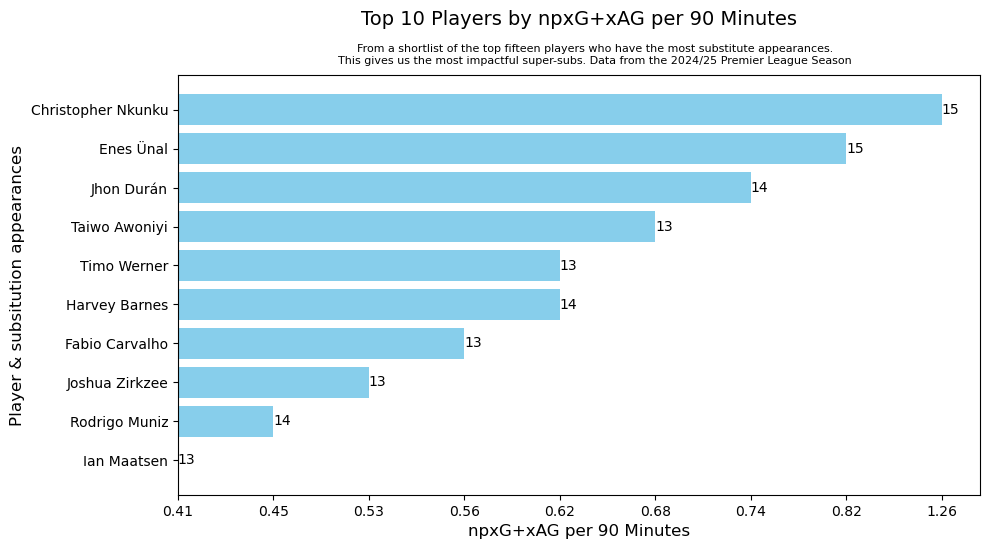

In [147]:
plt.figure(figsize=(10, 6))
bars = plt.barh(
    y=top10['Player'],                      
    width=top10['npxG+xAG_per90'],          
    color='skyblue'
)


plt.title("Top 10 Players by npxG+xAG per 90 Minutes", fontsize=14, y=1.10)
plt.suptitle("From a shortlist of the top fifteen players who have the most substitute appearances.\nThis gives us the most impactful super-subs. Data from the 2024/25 Premier League Season",
             fontsize=8, y=0.85, x=0.60)
plt.xlabel("npxG+xAG per 90 Minutes", fontsize=12)
plt.ylabel("Player & subsitution appearances", fontsize=12)

for bar, appearances in zip(bars, top10['Substitute Appearances']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{appearances}", 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()